In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("tour_logs_train.csv")

In [3]:
train_df.count()

Gig_ID                   2000
Venue_ID                 2000
Show_DateTime            2000
Day_of_Week              2000
Volume_Level             1819
Ticket_Price             2000
Crowd_Size               1960
Opener_Rating            2000
Weather                  2000
Moon_Phase               2000
Band_Outfit              2000
Merch_Sales_Post_Show    2000
Crowd_Energy             2000
dtype: int64

In [4]:
import primary_cleaning

In [5]:
clean_df = train_df.copy()

In [6]:
clean_df = primary_cleaning.cleaning_data(clean_df)

In [7]:
clean_df.count()

Venue_ID         2000
Show_DateTime    2000
Day_of_Week      2000
Volume_Level     2000
Ticket_Price     2000
Crowd_Size       2000
Opener_Rating    2000
Weather          2000
Moon_Phase       2000
Band_Outfit      2000
Crowd_Energy     2000
dtype: int64

In [8]:
clean_df.describe()

,Day_of_Week,Volume_Level,Ticket_Price,Crowd_Size,Opener_Rating,Crowd_Energy
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,3.006000,5.601500,52.075072,536.982500,3.01700,55.126035
std,2.024849,2.971045,20.339216,164.341483,1.40844,47.384777
min,0.000000,1.000000,0.000000,100.000000,1.00000,-10.000000
25%,1.000000,3.000000,38.557500,429.000000,2.00000,43.150000
50%,3.000000,5.000000,52.250000,530.500000,3.00000,55.515000
75%,5.000000,8.000000,65.522500,645.000000,4.00000,67.447500
max,6.000000,11.000000,120.000000,1200.000000,5.00000,999.000000


In [9]:
clean_df = clean_df[(clean_df["Crowd_Energy"] > 0) & (clean_df["Crowd_Energy"]  <= 100) ]

In [10]:
clean_df.describe()

,Day_of_Week,Volume_Level,Ticket_Price,Crowd_Size,Opener_Rating,Crowd_Energy
count,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000
mean,3.022329,5.586390,52.139701,536.415205,3.027645,56.340282
std,2.023409,2.964705,20.337262,164.479468,1.405264,17.231568
min,0.000000,1.000000,0.000000,100.000000,1.000000,0.180000
25%,1.000000,3.000000,38.810000,429.000000,2.000000,45.890000
50%,3.000000,5.000000,52.300000,530.500000,3.000000,56.890000
75%,5.000000,8.000000,65.600000,646.000000,4.000000,68.220000
max,6.000000,11.000000,120.000000,1200.000000,5.000000,100.000000


### Now we have cleaned data set

## lets test singer hypothesis

In [11]:
clean_df.to_csv("clean_df.csv", index=False)

In [12]:
df = clean_df.copy()

## Time and Day

#### singer has conspiracy theories like tuesdays are bad and weekends are good
#### and lets check time of the day too (i already divided time of the day to four catagories)

In [13]:
df.groupby("Day_of_Week")["Crowd_Energy"].describe()

,count,mean,std,min,25%,50%,75%,max
Day_of_Week,,,,,,,,
0,276.0,55.188514,17.581631,4.35,44.6150,54.965,66.8100,98.94
1,281.0,55.762135,17.346842,6.88,44.8900,56.720,68.3900,90.58
2,228.0,54.342544,16.773238,0.18,44.8875,54.330,65.6975,93.59
3,257.0,55.421946,17.308524,4.32,44.8600,55.000,66.4200,94.96
4,298.0,53.479094,15.903697,1.69,43.8475,53.755,63.6700,93.21
5,261.0,60.068736,17.350484,8.45,50.5800,61.080,71.0600,100.00
6,280.0,60.095107,17.290538,0.20,51.6325,61.325,71.2525,96.71


<Axes: xlabel='Day_of_Week', ylabel='Crowd_Energy'>

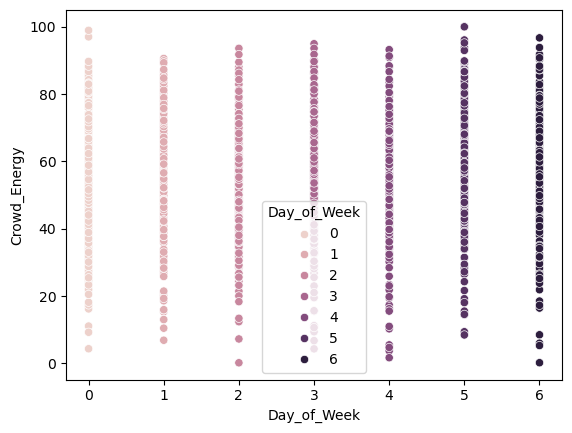

In [14]:
sns.scatterplot(x = "Day_of_Week", y = "Crowd_Energy", hue = "Day_of_Week",data = df) 

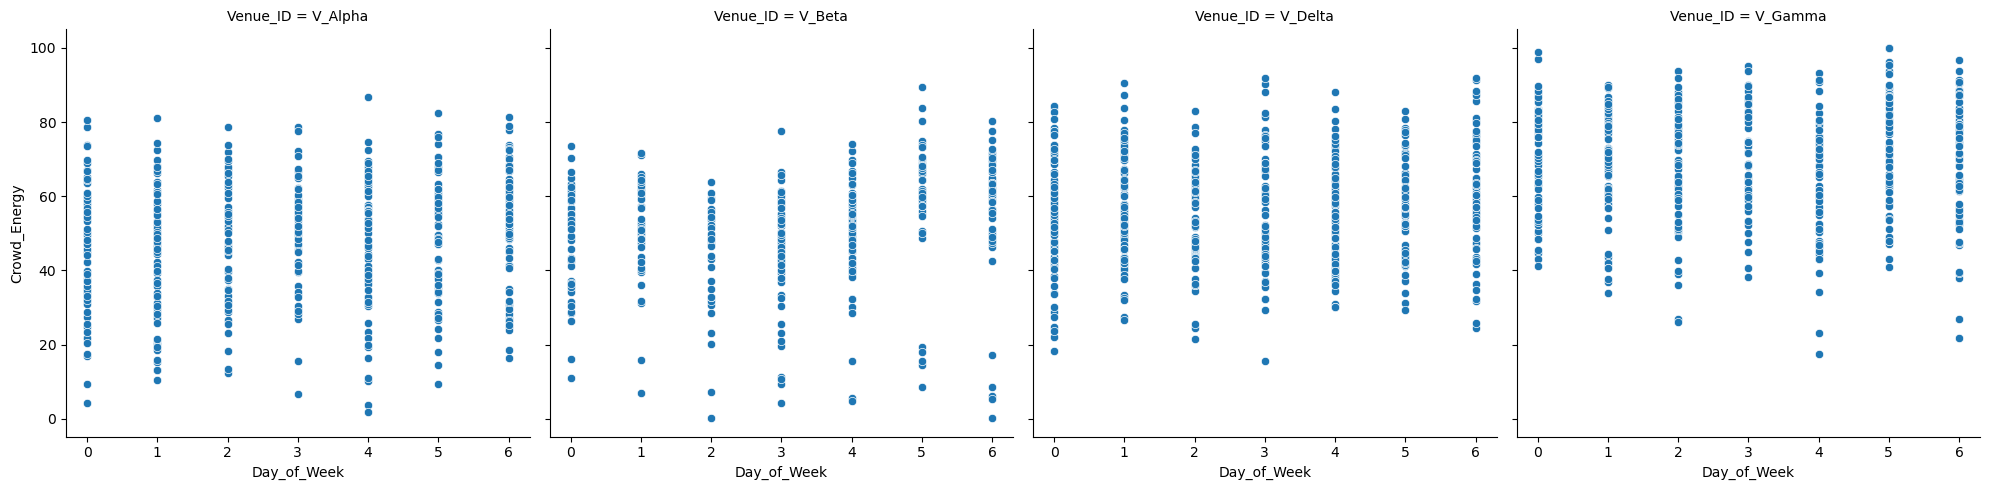

In [15]:
sns.relplot(
    x="Day_of_Week",
    y="Crowd_Energy",
    col="Venue_ID",
    data=df,
    kind="scatter"
)

<Axes: xlabel='Day_of_Week', ylabel='Crowd_Energy'>

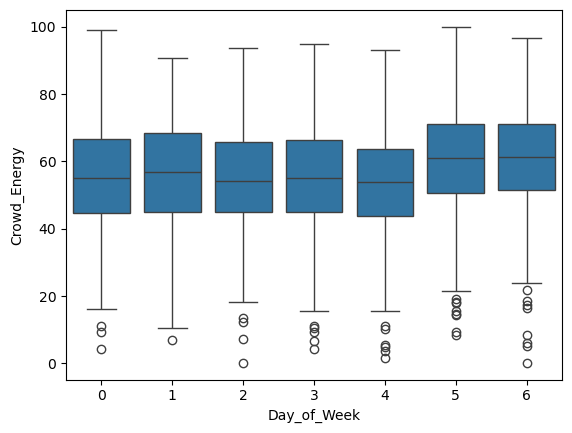

In [16]:
sns.boxplot(
    x="Day_of_Week",
    y="Crowd_Energy",
    data=df
)

#### It seems weekdays shows some impact

In [17]:
df.groupby("Show_DateTime")["Crowd_Energy"].describe()

,count,mean,std,min,25%,50%,75%,max
Show_DateTime,,,,,,,,
Afternoon,254.0,54.696181,22.034514,0.20,39.3025,58.785,70.0700,96.08
Evening,1092.0,56.630595,16.424770,1.69,46.1575,56.390,68.3200,97.01
Late Night,525.0,56.709429,16.213041,0.18,47.2000,57.440,66.8900,100.00
Morning,10.0,47.018000,13.352007,14.49,48.1050,51.170,52.3325,60.55


<Axes: xlabel='Show_DateTime', ylabel='Crowd_Energy'>

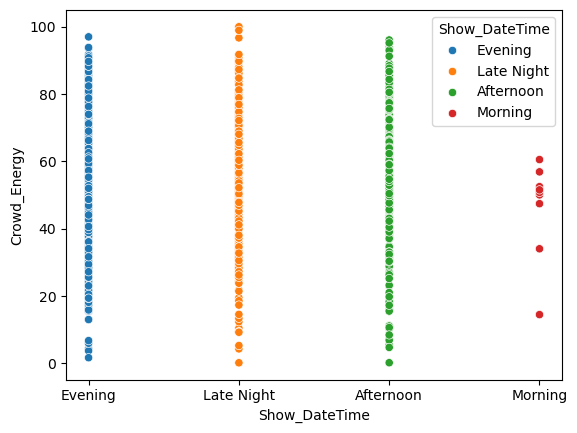

In [18]:
sns.scatterplot(x = "Show_DateTime", y = "Crowd_Energy", hue = "Show_DateTime",data = df) 

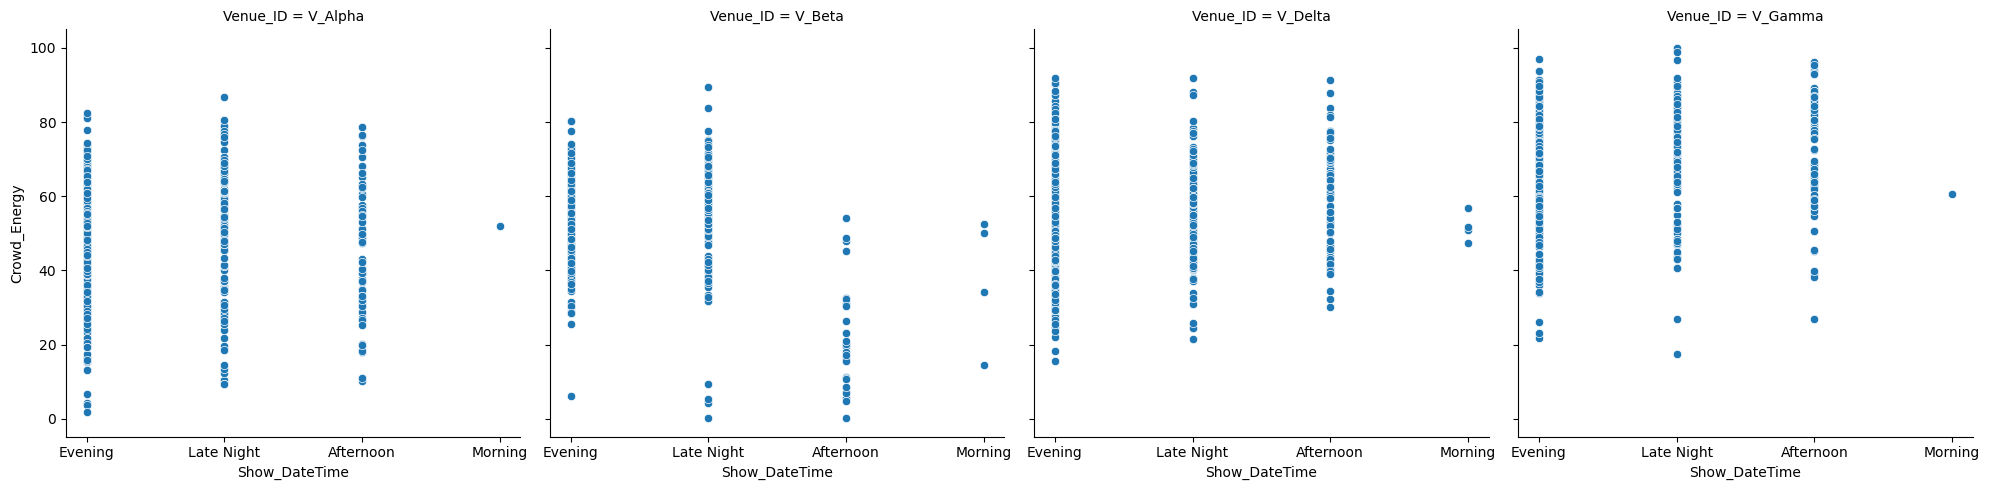

In [19]:
sns.relplot(
    x="Show_DateTime",
    y="Crowd_Energy",
    col="Venue_ID",
    data=df,
    kind="scatter"
)

#### As expected morning shows are few even they have low Crowd_Energies

## Outfit

In [20]:
df.groupby("Band_Outfit")["Crowd_Energy"].describe()

,count,mean,std,min,25%,50%,75%,max
Band_Outfit,,,,,,,,
Denim,706.0,55.397436,17.266655,0.20,45.3500,55.480,66.9875,100.00
Leather,723.0,56.787621,17.245532,5.30,45.6500,57.170,68.7600,96.71
Spandex,452.0,57.097412,17.125827,0.18,47.8825,58.485,68.9050,98.94


<Axes: xlabel='Band_Outfit', ylabel='Crowd_Energy'>

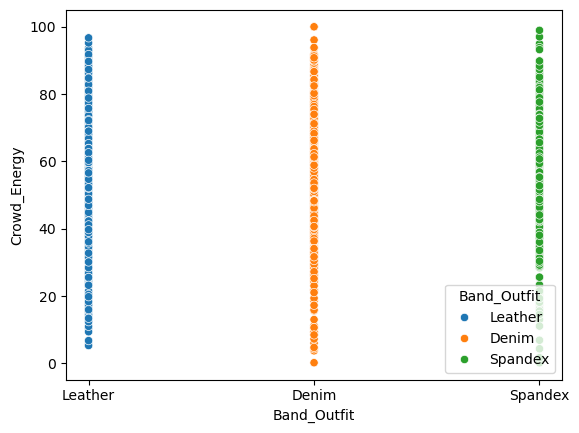

In [21]:
sns.scatterplot(x = "Band_Outfit", y = "Crowd_Energy", hue = "Band_Outfit",data = df) 

<Axes: xlabel='Band_Outfit', ylabel='Crowd_Energy'>

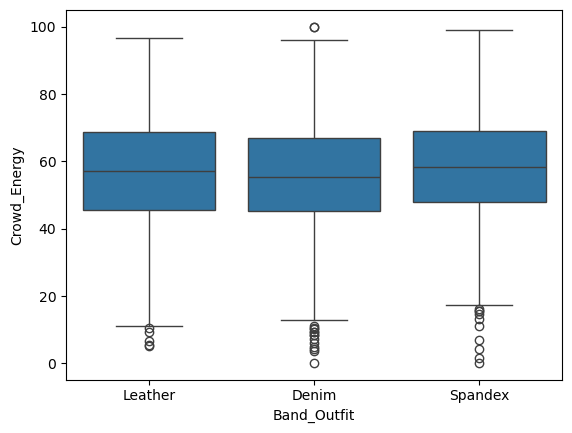

In [22]:
sns.boxplot(
    x="Band_Outfit",
    y="Crowd_Energy",
    data=df
)

#### As we can see the outfit has no importance in crowd enery

## Moon phase

In [23]:
df.groupby("Moon_Phase")["Crowd_Energy"].describe()

,count,mean,std,min,25%,50%,75%,max
Moon_Phase,,,,,,,,
First Quarter,265.0,55.292717,16.812093,6.88,46.4700,55.210,66.2200,93.60
Full Moon,190.0,55.453632,16.945249,4.35,45.8425,56.815,67.4125,91.79
Last Quarter,234.0,57.035256,17.783400,3.74,43.8500,58.270,70.0350,95.21
New Moon,266.0,55.029624,17.313057,4.32,43.0450,54.640,66.1375,100.00
Waning Crescent,212.0,55.657217,18.042081,7.26,45.6800,55.970,66.7150,97.01
Waning Gibbous,254.0,56.240394,16.546030,6.76,47.1375,56.265,67.5375,100.00
Waxing Crescent,236.0,57.164492,17.501737,0.18,48.0175,58.600,69.6050,90.41
Waxing Gibbous,224.0,59.053437,16.856634,0.20,47.7775,60.345,70.2925,96.08


<Axes: xlabel='Moon_Phase', ylabel='Crowd_Energy'>

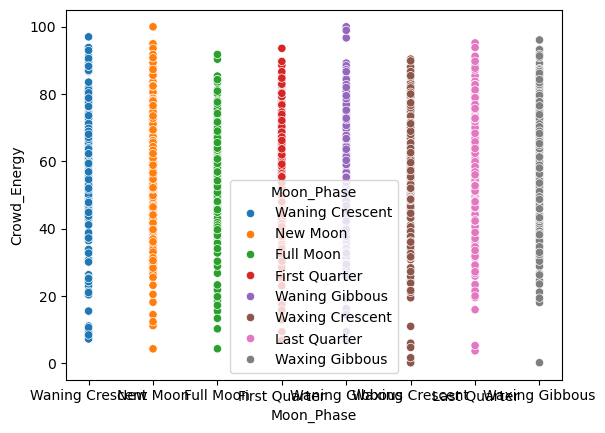

In [24]:
sns.scatterplot(x = "Moon_Phase", y = "Crowd_Energy", hue = "Moon_Phase",data = df) 

<Axes: xlabel='Moon_Phase', ylabel='Crowd_Energy'>

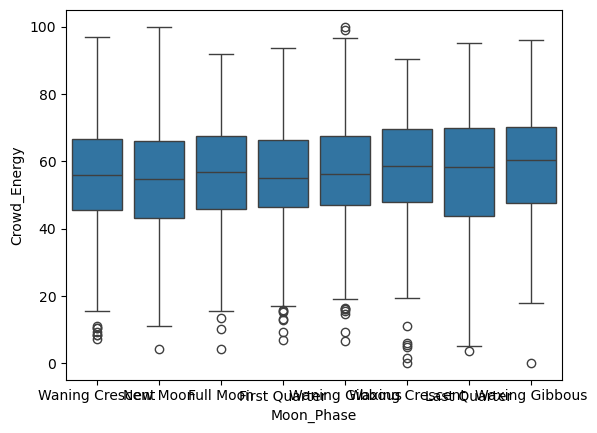

In [25]:
sns.boxplot(
    x="Moon_Phase",
    y="Crowd_Energy",
    data=df
)

#### As we can observe moon phase is also behaving like band outfit and further encoding may create noice

## Weather

In [26]:
df.groupby("Weather")["Crowd_Energy"].describe()

,count,mean,std,min,25%,50%,75%,max
Weather,,,,,,,,
Clear,464.0,55.965474,18.011466,0.18,45.2425,57.215,68.2875,100.00
Cloudy,445.0,57.833124,16.873927,3.74,48.4800,59.310,69.8400,95.21
Rainy,482.0,56.897531,16.512386,1.69,46.9725,56.505,67.5375,93.84
Stormy,490.0,54.791306,17.401105,4.74,43.6000,54.765,66.7300,100.00


<Axes: xlabel='Weather', ylabel='Crowd_Energy'>

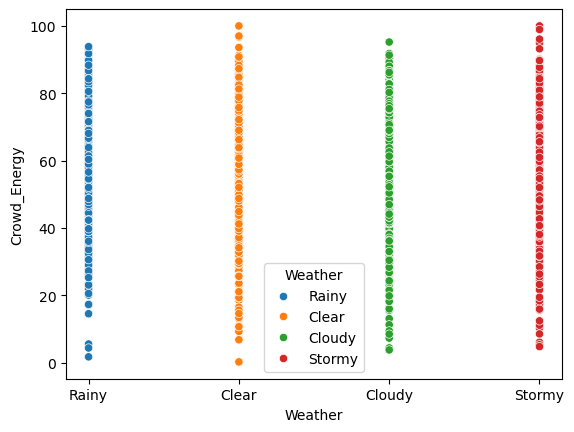

In [27]:
sns.scatterplot(x = "Weather", y = "Crowd_Energy", hue = "Weather",data = df) 

<Axes: xlabel='Weather', ylabel='Crowd_Energy'>

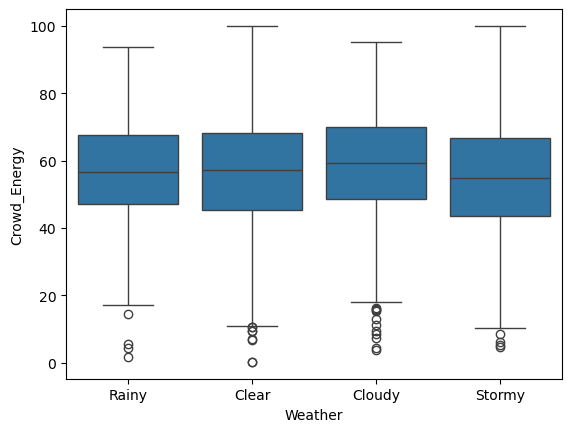

In [28]:
sns.boxplot(
    x="Weather",
    y="Crowd_Energy",
    data=df
)

#### By box plots I think we can consider weather, further details known by model performance

## Opener_Rating

In [29]:
df.groupby("Opener_Rating")["Crowd_Energy"].describe()

,count,mean,std,min,25%,50%,75%,max
Opener_Rating,,,,,,,,
1,359.0,53.099833,15.665584,0.20,43.6800,54.780,63.0850,90.58
2,372.0,56.064812,16.366053,0.18,46.8900,57.880,68.3425,91.24
3,390.0,57.263026,16.614300,4.32,47.6875,58.675,69.6450,93.21
4,378.0,55.724815,18.055959,1.69,44.9975,56.145,68.1800,93.60
5,382.0,59.320838,18.686613,6.88,47.1900,58.745,73.5850,100.00


<Axes: xlabel='Opener_Rating', ylabel='Crowd_Energy'>

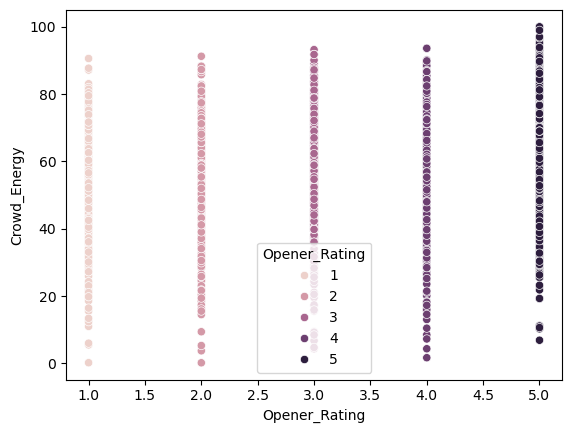

In [30]:
sns.scatterplot(x = "Opener_Rating", y = "Crowd_Energy", hue = "Opener_Rating",data = df) 

<Axes: xlabel='Opener_Rating', ylabel='Crowd_Energy'>

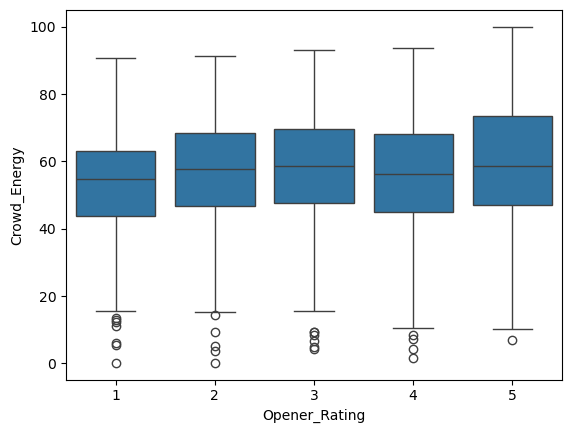

In [31]:
sns.boxplot(
    x="Opener_Rating",
    y="Crowd_Energy",
    data=df
)

We can consider opener rating

## Ticket_Price

<Axes: xlabel='Ticket_Price', ylabel='Crowd_Energy'>

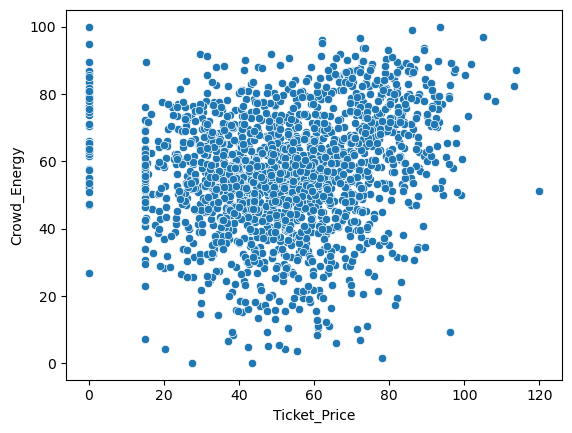

In [32]:
sns.scatterplot(x = "Ticket_Price",y = "Crowd_Energy",data = df)

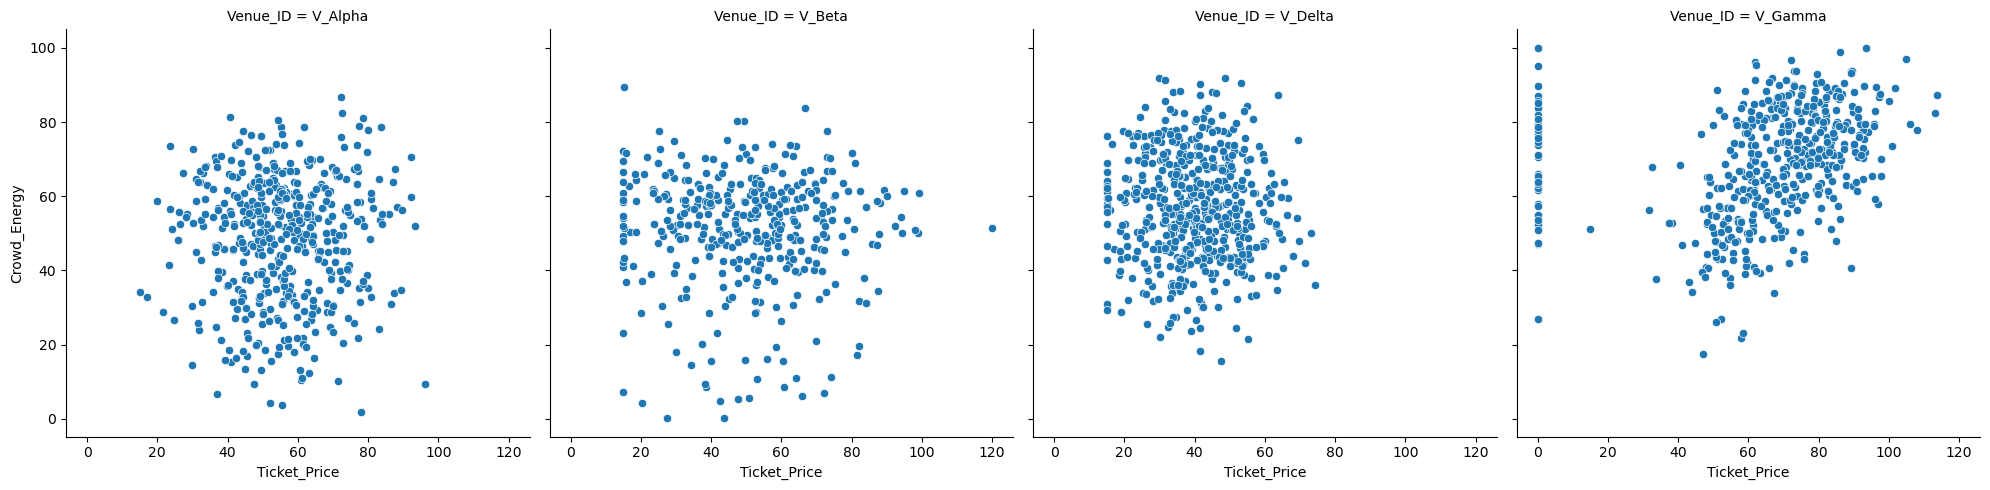

In [33]:
sns.relplot(
    x="Ticket_Price",
    y="Crowd_Energy",
    col="Venue_ID",
    data=df,
    kind="scatter"
)

#### It showing some week relation and there is increase in energy with price in V_Gamma

## Volume_Level

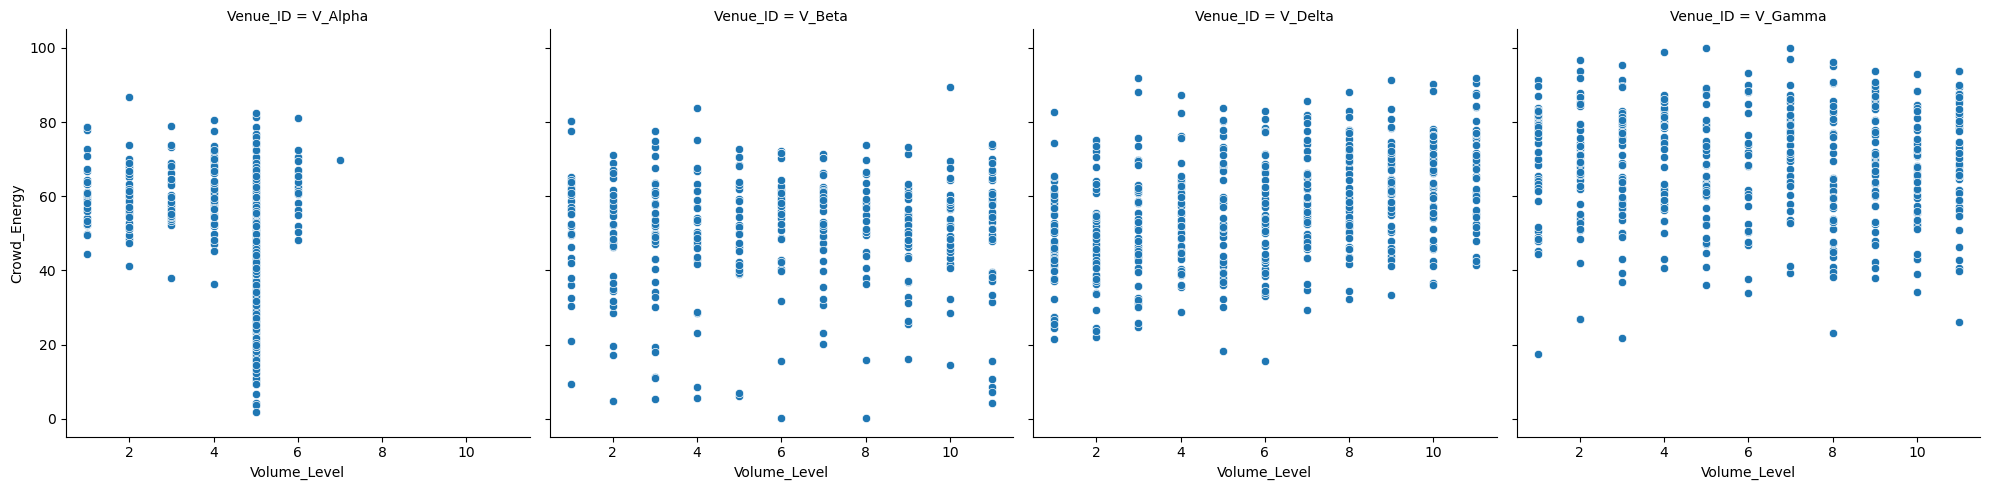

In [34]:
sns.relplot(
    x="Volume_Level",
    y="Crowd_Energy",
    col="Venue_ID",
    data=df,
    kind="scatter"
)


The effect of volume on crowd energy is venue-dependent.
In V_Alpha, volume shows a weak influence

## Crowd size

<Axes: xlabel='Crowd_Size', ylabel='Crowd_Energy'>

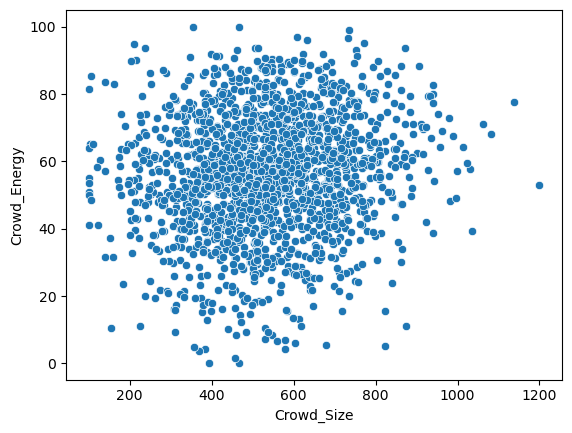

In [35]:
sns.scatterplot(x = "Crowd_Size",y = "Crowd_Energy",data = df)

Looks like there is a improvemet in Energy with Crowd_Size

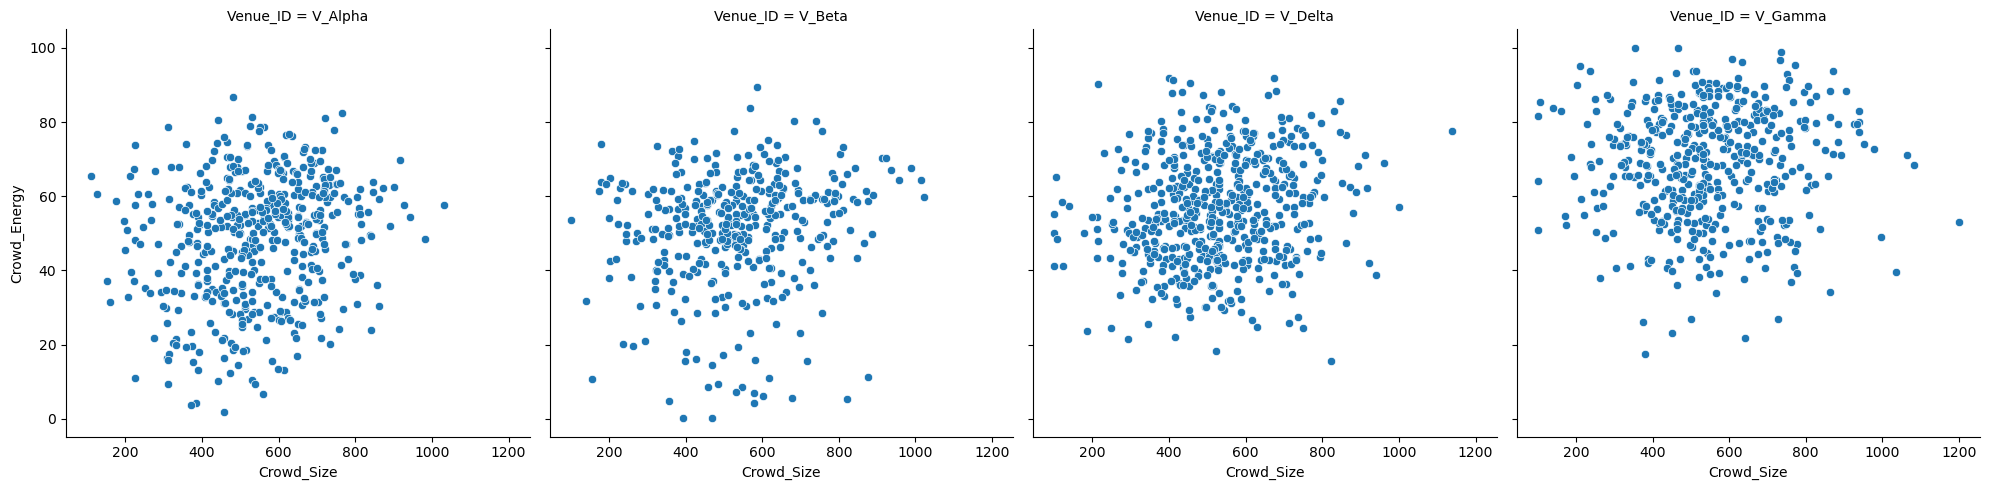

In [36]:
sns.relplot(
    x="Crowd_Size",
    y="Crowd_Energy",
    col="Venue_ID",
    data=df,
    kind="scatter"
)

Almost increasing in Energy for increasing in crowd_size